In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [3]:
brazil_data_unclean = pd.read_csv(
    "b3_stocks_1994_2020.csv"
)

In [4]:
brazil_data_unclean

,datetime,ticker,open,close,high,low,volumen
0,1994-07-04,ACE 3,48.00,48.00,48.00,47.00,46550.00
1,1994-07-04,ALP 3,155.27,156.00,156.00,155.27,163405.80
2,1994-07-04,ALP 4,131.00,131.00,131.00,131.00,6550.00
3,1994-07-04,IBP 6,600.00,600.00,600.00,600.00,7800.00
4,1994-07-04,AQT 4,0.89,0.99,0.99,0.85,13137.00
...,...,...,...,...,...,...,...
1883198,2020-12-28,Z1TO34,36.72,36.72,36.72,36.72,1358.64
1883199,2020-12-29,Z1TO34,36.31,36.31,36.31,36.31,3631.00
1883200,2020-12-30,Z1TO34,38.09,37.50,38.09,37.50,2295.17
1883201,2020-12-23,Z1TS34,209.18,209.18,209.18,209.18,10459.00


<AxesSubplot:>

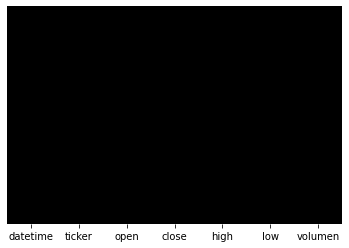

In [5]:
sns.heatmap(
    brazil_data_unclean.isnull(), yticklabels=False, cbar=False, cmap="cubehelix"
)

In [6]:
brazil_data_unclean.isna().any()

datetime    False
ticker      False
open        False
close       False
high        False
low         False
volumen     False
dtype: bool

In [7]:
#since there is no unclean data:
brazil_data = brazil_data_unclean

In [8]:
brazil_features = ["open", "high", "low", "close", "volumen"]

In [9]:
X = brazil_data[brazil_features]

In [10]:
X.describe()

,open,high,low,close,volumen
count,1.883203e+06,1.883203e+06,1.883203e+06,1.883203e+06,1.883203e+06
mean,6.814208e+01,6.882414e+01,6.754027e+01,6.827674e+01,1.668286e+07
std,1.689781e+03,1.699966e+03,1.683604e+03,1.695070e+03,1.026344e+08
min,1.000000e-02,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00
25%,3.960000e+00,4.000000e+00,3.890000e+00,3.960000e+00,1.800500e+04
50%,1.369000e+01,1.392000e+01,1.345000e+01,1.370000e+01,2.526560e+05
75%,3.670000e+01,3.714000e+01,3.608000e+01,3.673000e+01,4.794014e+06
max,1.297776e+06,1.297776e+06,1.297776e+06,1.297776e+06,4.298380e+10


### Note: We will predict the future performance of each feature in X based on the past performance of ALL other features in X

In [11]:
X.head()

,open,high,low,close,volumen
0,48.00,48.00,47.00,48.00,46550.0
1,155.27,156.00,155.27,156.00,163405.8
2,131.00,131.00,131.00,131.00,6550.0
3,600.00,600.00,600.00,600.00,7800.0
4,0.89,0.99,0.85,0.99,13137.0


# Part 1: Predict Open Prices

In [101]:
y_open = brazil_data.open

In [102]:
open_train_X, open_test_X, open_train_y, open_test_y = train_test_split(X, y_open, train_size=0.7,test_size=0.3) 

In [103]:
open_model = LinearRegression()

In [104]:
open_model.fit(open_train_X, open_train_y)

LinearRegression()

In [105]:
open_y_pred = model.predict(open_test_X)

In [106]:
print("Mean squared error: %.2f" % mean_squared_error(open_test_y, open_y_pred))

Mean squared error: 0.00


# Part 2: Predict High Prices

In [121]:
y_high = brazil_data.high

In [122]:
high_train_X, high_test_X, high_train_y, high_test_y = train_test_split(X, y_high, train_size=0.7,test_size=0.3) 

In [123]:
high_model = LinearRegression()

In [124]:
high_y_pred = model.predict(high_test_X)

In [125]:
print("Mean squared error: %.2f" % mean_squared_error(high_test_y, high_y_pred))

Mean squared error: 432.28


# Part 3: Predict Low Prices

In [116]:
y_low = brazil_data.low

In [117]:
low_train_X, low_test_X, low_train_y, low_test_y = train_test_split(X, y_low, train_size=0.7,test_size=0.3) 

In [118]:
low_model = LinearRegression()

In [119]:
low_y_pred = model.predict(low_test_X)

In [127]:
print("Mean squared error: %.2f" % mean_squared_error(low_test_y, low_y_pred))

Mean squared error: 3097.04


# Part 4: Predict Close Prices

In [128]:
y_close = brazil_data.close

In [129]:
close_train_X, close_test_X, close_train_y, close_test_y = train_test_split(X, y_close, train_size=0.7,test_size=0.3) 

In [130]:
close_model = LinearRegression()

In [131]:
close_y_pred = model.predict(close_test_X)

In [132]:
print("Mean squared error: %.2f" % mean_squared_error(close_test_y, close_y_pred))

Mean squared error: 2377.68


# Part 5: Predict Volume

In [136]:
y_vol = brazil_data.volumen

In [137]:
vol_train_X, vol_test_X, vol_train_y, vol_test_y = train_test_split(X, y_vol, train_size=0.7,test_size=0.3) 

In [138]:
vol_model = LinearRegression()

In [139]:
vol_y_pred = model.predict(vol_test_X)

In [140]:
print("Mean squared error: %.2f" % mean_squared_error(vol_test_y, vol_y_pred))

Mean squared error: 10691296694687364.00
